## **KNN Classification Algorithm** 
### **Author:** Hansal Shah 

# **Importing all the required libraries**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# **Building K Neighbours Classifier from scratch**


In [ ]:
class KNeighboursClassifier:
  def __init__ (self, k=3):
    self.k = k
  
  def fit(self, X, y):
    self.X_train = np.array(X)
    self.y_train = np.array(y)

  def predict(self, X):
    X_test = np.array(X)
    predictions = [self.closest_to(x) for x in X_test]
    return pd.DataFrame(predictions)

  def closest_to(self,x):  
    distances = np.array([self.euclidean_distance(x, v) for v in self.X_train])
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
    return max(k_nearest_labels, key=k_nearest_labels.count)

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


# **Making predictions using the Iris dataset**

### ***Loading the dataset***

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

### ***Visualizing the dataset***

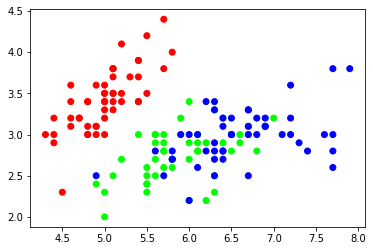

In [ ]:
colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

'''
Plotting the target variable in a two dimensional graph formed using the sepal 
length (cm) and sepal width (cm)
'''
plt.figure()
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=colors)
plt.show()

### ***Splitting into training and testing dataset***

1.   Training dataset (80%)
2.   Testing dataset (20%)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=6)

### ***Using K Neighbours Classifier to make predictions***


---

1.   Value of k=3
2.   Value of k=5





In [ ]:
#k=3
knn_model1 = KNeighboursClassifier(3)
knn_model1.fit(X_train, y_train)
predictions = knn_model1.predict(X_test)
print("Accuracy (k=3): "+str(accuracy_score(y_test, predictions)))

Accuracy (k=3): 0.9333333333333333


In [ ]:
#k=5
knn_model2 = KNeighboursClassifier(5)
knn_model2.fit(X_train, y_train)
predictions = knn_model2.predict(X_test)
print("Accuracy (k=5): "+str(accuracy_score(y_test, predictions)))

Accuracy (k=5): 0.9666666666666667


In [ ]:
print("Accuracy achieved using Decision Tree Regressor: 1.0")

Accuracy achieved using Decision Tree Regressor: 1.0


### ***Comparing K Neigbours Classifiers and Decision Tree Classifier (Results)***

In [ ]:
print("Accuracy of different models from lowest to highest")
print("1. KNN (k=3): 0.93")
print("2. KNN (k=5): 0.96")
print("3. Decision Tree: 1.0")

Accuracy of different models from lowest to highest
1. KNN (k=3): 0.93
2. KNN (k=5): 0.96
3. Decision Tree: 1.0
